In [9]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df1=pd.DataFrame(load_wine().data)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [25]:
df2= pd.DataFrame(load_wine().target)
df2

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [28]:
df1=df1.iloc[:, :2]
df1


,0,1
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df1, df2, train_size=0.70, random_state=43)

In [30]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

#fitting training set to scaler
scaler.fit_transform(X_train)

#transforming train and test sets
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
#Converting new scaled train and test data into dataframe
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
np.round(X_train.describe()) #for original training dataset

,0,1
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [36]:
np.round(X_test_scaled.describe())

,0,1
count,54.0,54.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,1.0
max,1.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

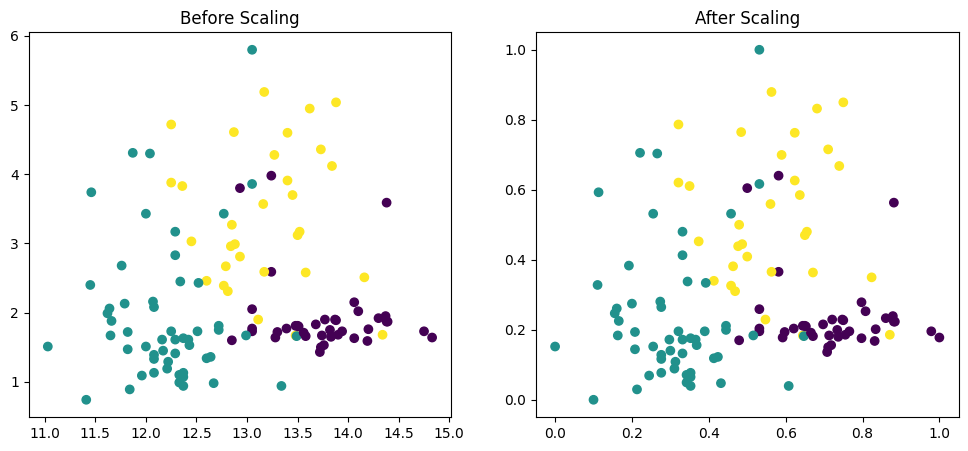

In [40]:
#For visualization

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train[0], X_train[1], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[0], X_train_scaled[1], c=y_train)
ax2.set_title("After Scaling")
plt.show

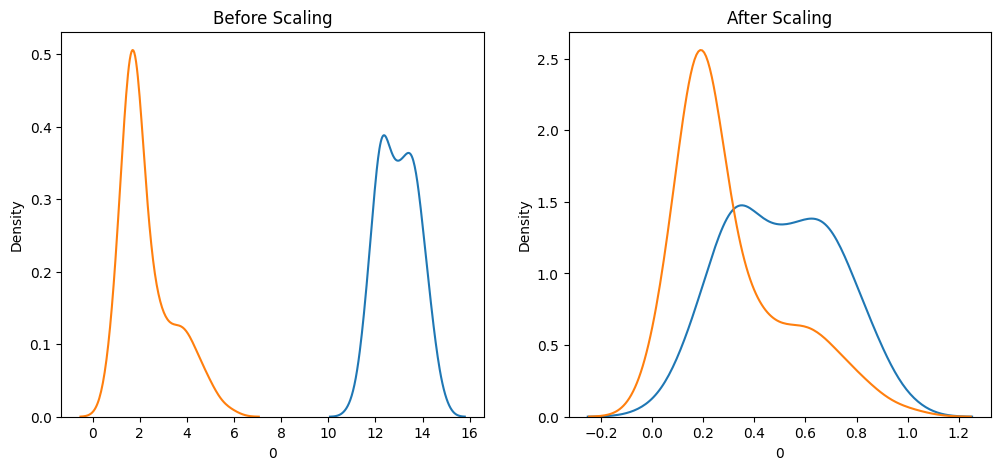

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train[0], ax=ax1)
sns.kdeplot(X_train[1], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled[0], ax=ax2)
sns.kdeplot(X_train_scaled[1], ax=ax2)
plt.show()

